In [15]:
# Suppress warnings thrown by different packages
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Set Pandas Options to Display all rows & columns when displayed
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
# Read the Dataset
df = pd.read_csv(r"C:\Users\Ashis\Desktop\ML Project\Project 1\books_features_enhanced.csv")
df.drop('Unnamed: 0', axis=1, inplace=True)
print('Dataframe Shape :', df.shape,'\n')

Dataframe Shape : (11101, 104) 



In [16]:
#label encoding categorical vaiables
le = LabelEncoder()
df.langs = le.fit_transform(df.langs)

df.head(3)

,bookID,title,authors,average_rating,isbn,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,raw_title,raw_pub,authors_comb,author_1,author_2,author_3,author_4,author_5,author_6,author_7,author_8,author_9,author_10,author_11,author_12,author_13,author_14,author_15,author_16,author_17,author_18,author_19,author_20,author_21,author_22,author_23,author_24,author_25,author_26,author_27,author_28,author_29,author_30,author_31,author_32,author_33,author_34,author_35,author_36,author_37,author_38,author_39,author_40,author_41,author_42,author_43,author_44,author_45,author_46,author_47,author_48,author_49,author_50,author_51,langs,IsAudio,num_authors,single_author,double_author,triple_author,multi_author,tot_rvws,curr_age,books_cnt,num_lng_iso,num_publishers,chgs_authors,num_ratings,num_langs,num_txrvws,times_published,oldest_pub_age,last_pub_age,first_pub_lang,max_pages,min_pages,med_pages,pub_intvl,auth_cat,IsClass,IsBio,IsAuto,IsAuBio,IsBuss,IsPolit,IsPhil,IsHist,IsPlay,IsPoem,HasStories,IsAntho,IsColl,HasParts
0,37134,consider the lilies,iain crichton smith/isobel murray,3.88,753812932,eng,144,332,33,1900-01-01,polygon,consider the lilies,polygon,"['iain crichton smith', 'isobel murray']",iain crichton smith,isobel murray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,0,0,365,1512.00,1.00,1.00,1.00,1.00,332.00,1.00,33.00,1.00,1512.00,1512.00,eng,144.00,144.00,144.00,0.00,double,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
1,24459,on duties (de officiis),marcus tullius cicero/walter miller,3.96,674990331,eng,448,111,11,1913-01-01,harvard university press,on duties,harvard university press,"['marcus tullius cicero', 'walter miller']",marcus tullius cicero,walter miller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,2,0,1,0,0,122,1353.00,1.00,1.00,1.00,1.00,111.00,1.00,11.00,1.00,1353.00,1353.00,eng,448.00,448.00,448.00,0.00,double,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
2,25692,agricola / germania / dialogue on oratory,tacitus/maurice hutton/robert maxwell ogilvie/...,3.95,674990390,mul,384,87,7,1914-01-01,harvard university press,agricola / germania / dialogue on oratory,harvard university press,"['tacitus', 'maurice hutton', 'robert maxwell ...",tacitus,maurice hutton,robert maxwell ogilvie,e.h. warmington,william peterson,michael winterbottom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,0,6,0,0,0,1,94,1341.00,1.00,1.00,1.00,1.00,87.00,1.00,7.00,1.00,1341.00,1341.00,mul,384.00,384.00,384.00,0.00,multiple,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN


In [31]:
# Selected features based on EDA

cols = ['num_pages', 'text_reviews_count','curr_age', 'num_authors', 'single_author', 'multi_author',
        'num_publishers', 'num_langs', 'times_published', 'oldest_pub_age',
        'pub_intvl', 'IsAudio', 'IsClass','IsAuBio', 'IsBuss', 'IsPolit', 'IsPhil', 'IsHist','HasStories', 
        'IsAntho', 'IsColl', 'IsPlay', 'IsPoem', 'average_rating', 'langs', 'tot_rvws']

dfc=df[cols].dropna()
dfc.shape

(11099, 26)

In [55]:
# Splitting Dataset into test & train datasets

# Considering Books with only ratings>200 (text reviews + ratings) to avoid noise in the data
y = dfc.loc[dfc.tot_rvws>200, cols].average_rating
X = dfc.loc[dfc.tot_rvws>200, cols].drop('average_rating', axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1111)

# display train & test shapes
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6523, 25), (6523,), (1152, 25), (1152,))

In [37]:
# !pip install lazypredict

In [42]:
# Using Quick predictions from different models in the lazypredict library to get the best performing models on data
from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

offset = int(X.shape[0] * 0.9)
lx_train, ly_train = X[:offset], y[:offset]
lx_test, ly_test = X[offset:], y[offset:]
reg = LazyRegressor(verbose=0,ignore_warnings=False, custom_metric=None )
models,prediction = reg.fit(lx_train, lx_test, ly_train, ly_test)

 74%|██████████████████████████████████████████████████████████████████████                         | 31/42 [01:01<00:12,  1.14s/it]

QuantileRegressor model failed to execute
Solver interior-point is not anymore available in SciPy >= 1.11.0.


 98%|████████████████████████████████████████████████████████████████████████████████████████████▋  | 41/42 [01:32<00:01,  1.75s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003444 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1510
[LightGBM] [Info] Number of data points in the train set: 6907, number of used features: 24
[LightGBM] [Info] Start training from score 3.958160


100%|███████████████████████████████████████████████████████████████████████████████████████████████| 42/42 [01:33<00:00,  2.23s/it]


In [43]:
print(models[:10])

                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.23       0.26  0.24        1.16
HistGradientBoostingRegressor                0.21       0.24  0.24        4.01
RandomForestRegressor                        0.17       0.19  0.25       25.36
GradientBoostingRegressor                    0.15       0.18  0.25        3.64
ExtraTreesRegressor                          0.11       0.14  0.26        9.16
BaggingRegressor                             0.08       0.11  0.26        2.44
XGBRegressor                                 0.07       0.10  0.27        0.75
NuSVR                                        0.06       0.09  0.27        4.97
SVR                                          0.05       0.08  0.27        3.94
AdaBoostRegressor                            0.01       0.05  0.27        0.71


In [40]:
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=1000, max_depth=15, max_features= 0.4, random_state=1001, oob_score=True)
 
# Fit the regressor with x and y data
regressor.fit(x_train, y_train)

RandomForestRegressor(max_depth=15, max_features=0.4, n_estimators=1000,
                      oob_score=True, random_state=1001)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
 
# Access the OOB Score
oob_score = regressor.oob_score_
print(f'Out-of-Bag Score: {oob_score}')
 
# Making predictions on the same data or new data
predictions = regressor.predict(x_test)
 
# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')
 
r2 = r2_score(y_test, predictions)
print(f'R-squared: {r2}')

Out-of-Bag Score: 0.16614797099915335
Mean Squared Error: 0.053745436239864455
R-squared: 0.20202448928708427


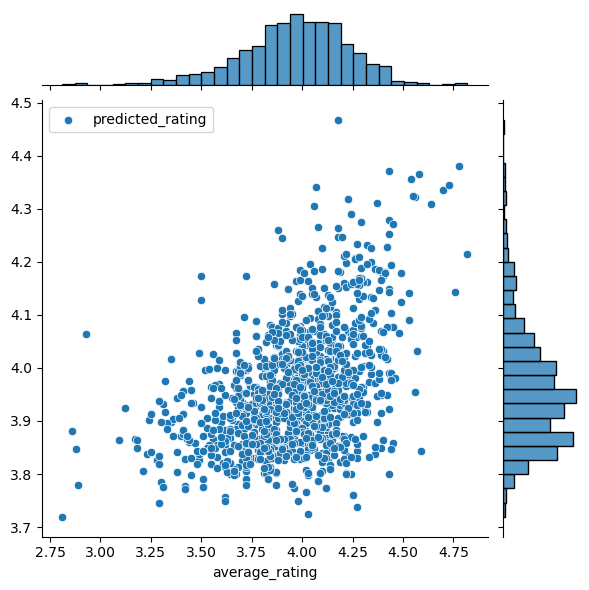

In [198]:
test= pd.DataFrame(columns=['y_test', 'predictions'])

test['y_test'] = y_test
test['predictions'] = predictions

sns.jointplot(test, x = y_test, y = predictions, label='predicted_rating')

In [63]:
global_importances_random = pd.Series(regressor.feature_importances_, index=x_train.columns)
global_importances_random.sort_values(ascending=True, inplace=True)
# sns.barplot(global_importances_random)

In [82]:
# !pip install shap
# Use Shapley values for telling us the most important features in the model.
import shap

explainer = shap.Explainer(regressor, x_test)
shap_values = explainer(x_test)

100%|===================| 1534/1535 [19:43<00:00]        

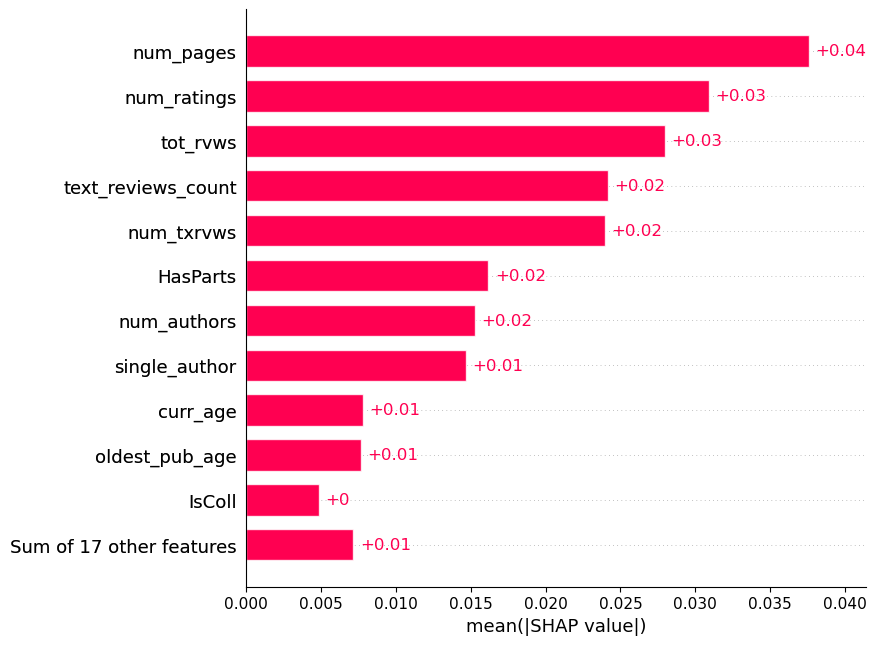

In [83]:
shap.plots.bar(shap_values, max_display=12)

In [44]:
# !pip install lightgbm
 
# Importing Required Library
import lightgbm as lgb
 
# Similarly LGBMRegressor can also be imported for a regression model.
from lightgbm import LGBMRegressor
 
# Creating an object for model and fitting it on training data set 
model = LGBMRegressor()
model.fit(x_train, y_train)
 
# Predicting the Target variable
pred = model.predict(x_test)
print(pred)
accuracy = model.score(x_test, y_test)
print(accuracy)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002055 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1489
[LightGBM] [Info] Number of data points in the train set: 6523, number of used features: 24
[LightGBM] [Info] Start training from score 3.957204
[3.7758814  3.90842202 4.1286746  ... 3.9952382  4.02695483 3.91280308]
0.2267838146943233


In [67]:
# Output the Title, ISBN, Actual_rating & predicted rating to a csv file

preds = pd.DataFrame(pred, index= x_test.index, columns=['pred_rating'])
predictions = pd.concat([df.loc[x_test.index,['title', 'isbn', 'average_rating']],preds], axis=1)
predictions.to_csv(r"C:\Users\Ashis\Desktop\ML Project\Project 1\books_predictions.csv")